# Data Selection

In [15]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Handling Null Values

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    mode_value = df[col].mode()[0]  
    df[col].fillna(mode_value, inplace=True)
df.isnull().sum()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10048\3281224349.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Standardization

In [6]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
df['ApplicantIncome'] = ss.fit_transform(df[['ApplicantIncome']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072991,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097728,0.0,141.0,360.0,1.0,Urban,Y


# Encoding

In [13]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder
en_data = df[['Property_Area']]
ohe = OneHotEncoder()
ar = ohe.fit_transform(en_data).toarray()
encoded = pd.DataFrame(ar,columns=['Urban', 'Rural', 'Semiurban'])
encoded.head(8)

,Urban,Rural,Semiurban
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0


# Train Test Split

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
y = df['Loan_Status']

In [30]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
y = la.fit_transform(y)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

class_report = classification_report(y_test, y_pred)

print('Classification Report:')
print(class_report)


Accuracy: 78.86%
Precision: 0.76
Recall: 0.99
F1-Score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



AUC-ROC: 0.76


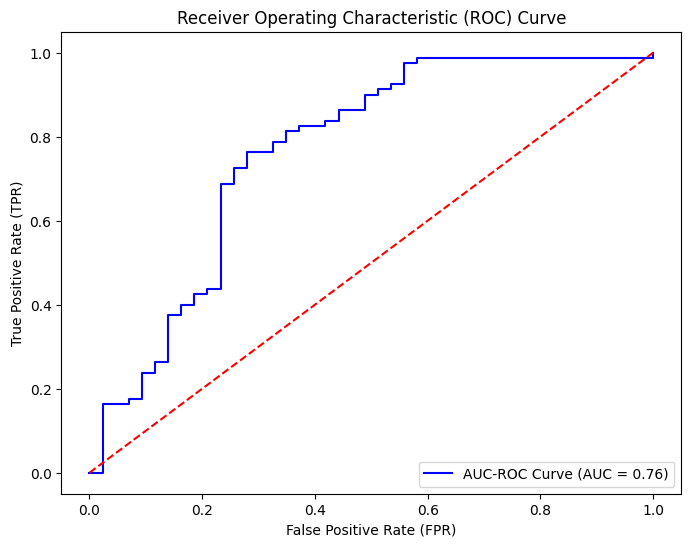

In [36]:
# for AUC-ROC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = lr.predict_proba(x_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {auc_roc:.2f}')

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [41]:
# Predictions on the training set
y_train_pred = lr.predict(x_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print("Training Set Performance:")
print(f'Accuracy: {accuracy_train * 100:.2f}%')
print(f'Precision: {precision_train:.2f}')
print(f'Recall: {recall_train:.2f}')
print(f'F1-Score: {f1_train:.2f}')

y_train_probs = lr.predict_proba(x_train)[:, 1]

auc_roc_train = roc_auc_score(y_train, y_train_probs)
print(f'Training AUC-ROC: {auc_roc_train:.2f}')


Training Set Performance:
Accuracy: 81.87%
Precision: 0.80
Recall: 0.98
F1-Score: 0.88
Training AUC-ROC: 0.69


In [43]:
# Test Set Performance
y_test_pred = lr.predict(x_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
y_test_probs = lr.predict_proba(x_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_test_probs)

print("\nTest Set Performance:")
print(f'Accuracy: {accuracy_test * 100:.2f}%')
print(f'Precision: {precision_test:.2f}')
print(f'Recall: {recall_test:.2f}')
print(f'F1-Score: {f1_test:.2f}')
print(f'Test AUC-ROC: {auc_roc_test:.2f}')



Test Set Performance:
Accuracy: 78.86%
Precision: 0.76
Recall: 0.99
F1-Score: 0.86
Test AUC-ROC: 0.76


In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[18 25]
 [ 1 79]]


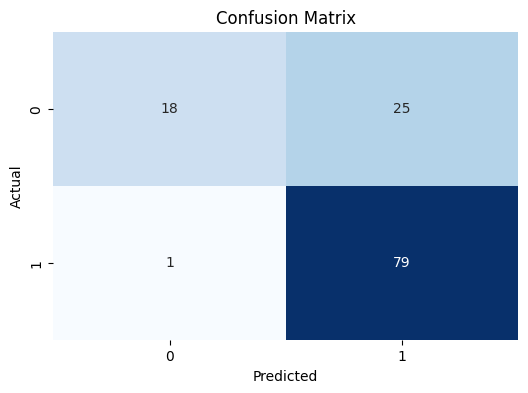

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


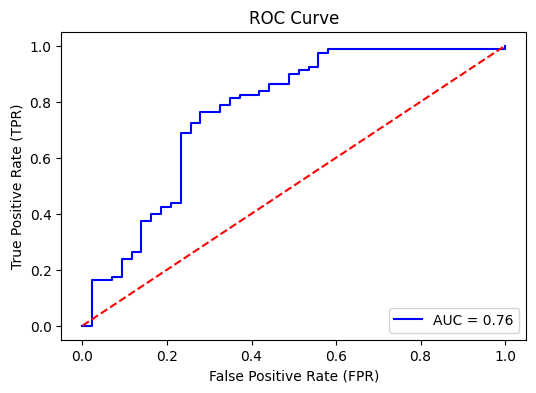

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = lr.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


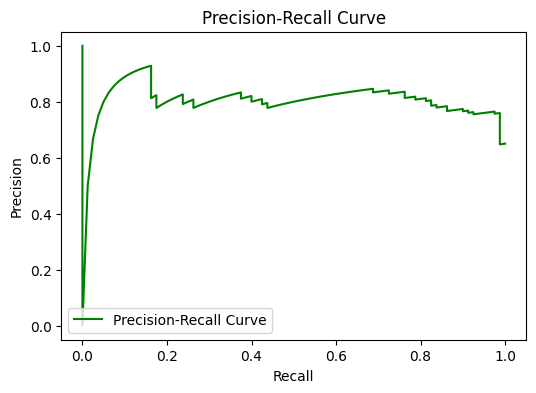

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


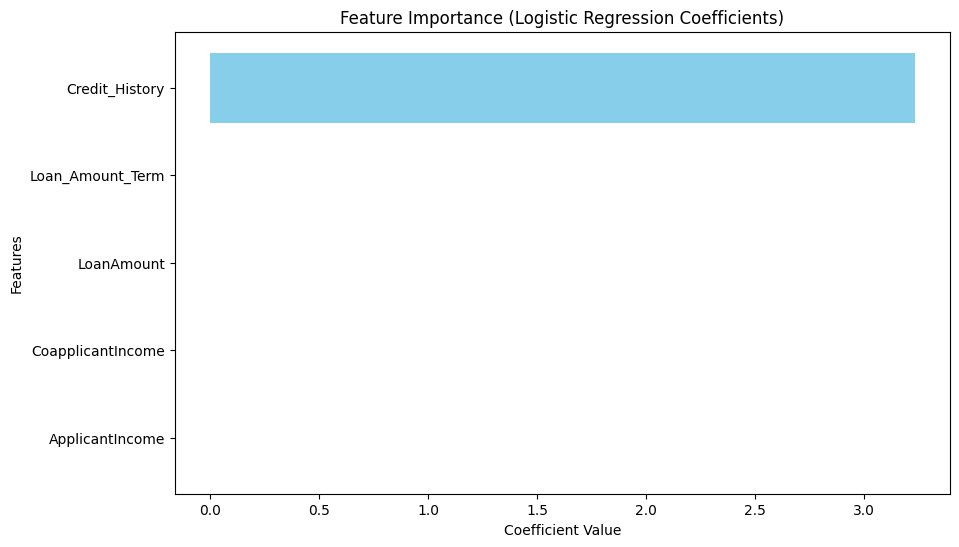

In [51]:
feature_names = x_train.columns
coefficients = lr.coef_.flatten()

plt.figure(figsize=(10,6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()
